In [1]:
from scipy.linalg import svd
import numpy as np

### 原理

In [2]:
A = [[4, 0, 1, 6],
     [0, 0, 5, 1],
     [2, 1, 3, 2]]

In [3]:
def my_svd(x, p=0.9):
    A = x
    U, s, Vh = svd(A)
    for i in range(s.shape[0]):
        percent = np.sum(s[:i+1]) / np.sum(s)
        if percent >= p:
            keep_num = i+1
            print('共有{0}个奇异值，保留了{1}个奇异值'.format(s.shape[0],keep_num))
            print('保留了原矩阵{:.3f}的特征比例'.format(percent))
            break
    new_U = U[:,:keep_num]
    new_s = np.diag(s[:keep_num])
    new_V = Vh[:keep_num,:]
    new_A = np.matmul(new_U,np.matmul(new_s,new_V))        
    return new_A

In [4]:
new_A = my_svd(A)
new_A

共有3个奇异值，保留了2个奇异值
保留了原矩阵0.923的特征比例


array([[4.16044759, 0.23533775, 0.99288496, 5.87821937],
       [0.26297024, 0.38571365, 4.9883386 , 0.8004041 ],
       [1.51314019, 0.28589459, 3.02158976, 2.36952934]])

In [5]:
s = [1,2,3]

In [6]:
np.diag(s)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

## 图像压缩

### 读入图片

- 方法一

In [7]:
import matplotlib.pyplot as plt

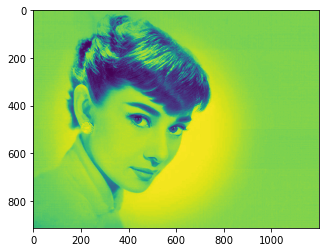

In [37]:
heben = plt.imread('赫本.jpg')
plt.imshow(heben)
plt.show()

In [9]:
heben

array([[181, 198, 213, ..., 197, 199, 209],
       [195, 201, 206, ..., 198, 200, 209],
       [208, 205, 202, ..., 199, 201, 208],
       ...,
       [159, 173, 184, ..., 203, 204, 200],
       [191, 168, 164, ..., 226, 211, 198],
       [191, 168, 164, ..., 226, 211, 198]], dtype=uint8)

- 方法二

In [10]:
from PIL import Image

In [11]:
img = Image.open('赫本.jpg')
# 以图片查看器的方式查看
img.show()

In [12]:
heben = np.asarray(img)
heben

array([[181, 198, 213, ..., 197, 199, 209],
       [195, 201, 206, ..., 198, 200, 209],
       [208, 205, 202, ..., 199, 201, 208],
       ...,
       [159, 173, 184, ..., 203, 204, 200],
       [191, 168, 164, ..., 226, 211, 198],
       [191, 168, 164, ..., 226, 211, 198]], dtype=uint8)

In [43]:
heben_A = my_svd(heben.astype(float),0.6)

共有914个奇异值，保留了17个奇异值
保留了原矩阵0.602的特征比例


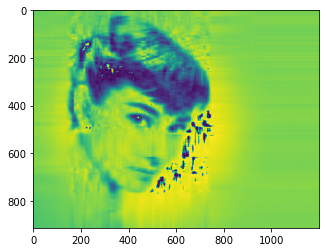

In [63]:
plt.imshow(heben_A.astype('uint8'))
plt.show()
plt.imsave('heben.jpg', heben_A.astype('uint8'))

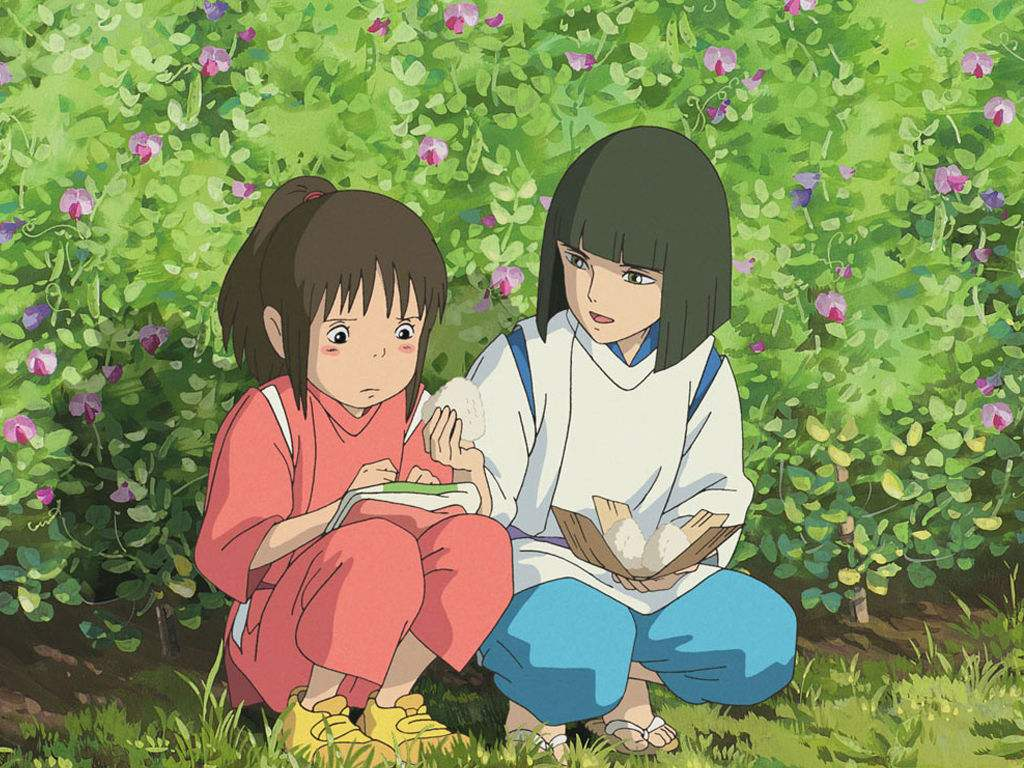

In [15]:
qyqx = Image.open('千与千寻.jpg')
qyqx

In [16]:
qx = np.asarray(qyqx)
qx.shape

(768, 1024, 3)

In [17]:
R = qx[:,:,0]
G = qx[:,:,1]
B = qx[:,:,2]

In [18]:
R_A = my_svd(R,0.5)
G_A = my_svd(G,0.5)
B_A = my_svd(B,0.5)

共有768个奇异值，保留了42个奇异值
保留了原矩阵0.501的特征比例
共有768个奇异值，保留了43个奇异值
保留了原矩阵0.502的特征比例
共有768个奇异值，保留了58个奇异值
保留了原矩阵0.501的特征比例


In [19]:
compress_img = np.dstack((R_A,G_A,B_A))
compress_img.shape

(768, 1024, 3)

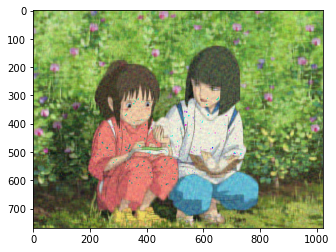

In [62]:
plt.imshow(compress_img.astype('uint8'))
plt.show()
plt.imsave('qyqx.png', compress_img.astype('uint8'))